# A. Business Goal

***Background:*** X Education provides online courses to industry professionals. Many professionals who are interested in the courses land on the website and browse for courses. X education advertises its courses across several marketing platforms such as Google, Olark chat, etc. Once visitors land on the website, they might perform engagement activities such as browsing courses, filling up forms, or watching some videos. When visitors fill up forms providing their email address or phone number, they get converted to leads. The company also acquires leads through past referrals. Once leads are acquired, employees from the sales team phone and email campaigns. Through this process, a fraction of generated leads gets converted into customers. However, the typical lead conversion rate at X education is around 30%, which is something this notebook attempts to improve.

The company goal is to build **a logistic regression model wherein you need to assign a lead score** to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

## Question: 
**What factors affect lead-to-customer conversion the most?**

Some to consider
* Audience: student, professionals, unpemployed, city and country of residence, etc
* Marketing: websites, search engines, media platforms, referals, etc
* Sale: method of engaging the leads (calls, texts, emails, free materials, etc)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import plotly.graph_objects as go
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

# B. Importing the Dataset and Preview

In [2]:
df = pd.read_csv('Leads X Education.csv')
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
df

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No          Select   
1                     2.50  ...                        No          Select   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No          Select   
4                     1.00  ...                        No          Select   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

In [4]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## B.1. Missing data

Note: There is a level call "Select" that should be treated as Null values. The "Select" level means the viewer/customers did not make a selection

In [5]:
# Identify columns that contain "Select" level
find_select = df.loc[: , (df == 'Select').any()] 

# Function converts "Select" level to NaN
def convert_to_NaN(df,col_names):
    for col in col_names:
        df[col][df[col] == 'Select'] = None
        df[col].fillna(value=np.nan, inplace=True)
        
convert_to_NaN(df,find_select.columns)

In [6]:
# Amount of missing data in each column
null_values = round(df.isnull().mean().sort_values(ascending = False)*100,2)
null_values

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

### Insights:
* The target column "Converted" doens't have any null values
* Drop columns with more than 70% of missing values: How did you hear about X Education, Lead Profile
* An equal portion of missing data are present in Assymetrique Index and Score columns (45.65%)
* Features with <2% of missing data can be imputed with appropriate values
* Features with 25%-50% of missing data will be explored for possibility of imputation or dropping

## B.2. EDA

### B.2.1. Numerical Features

In [7]:
df.drop(['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile'], axis=1, inplace=True)

In [8]:
# The Conversion rate
labels = df['Converted'].value_counts().index

fig = go.Figure(data=[go.Pie(labels=labels, values=df['Converted'].value_counts())])
fig.show()

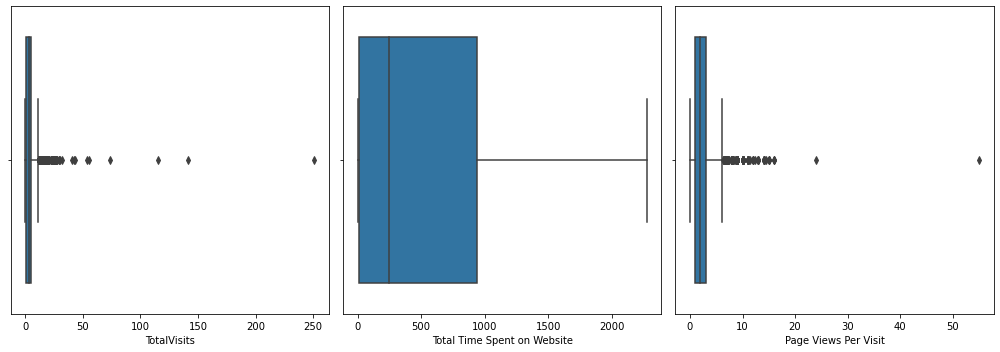

In [9]:
# Numerical input features in boxplots
plt.figure(figsize=(14,5))
i=1
web_interact = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

for col in web_interact:
    plt.subplot(1,3,i)
    sns.boxplot(df[col])
    i +=1
    plt.tight_layout()

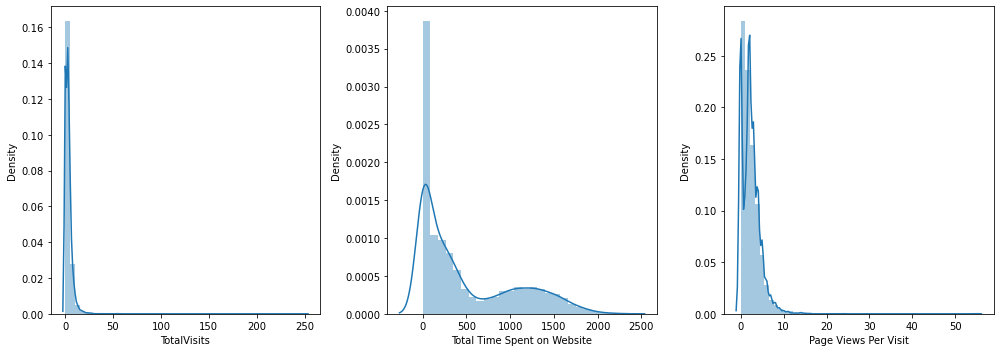

In [10]:
# Numerical input features in distribution plots
plt.figure(figsize=(14,5))
i=1
web_interact = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

for col in web_interact:
    plt.subplot(1,3,i)
    sns.distplot(df[col])
    i +=1
    plt.tight_layout()

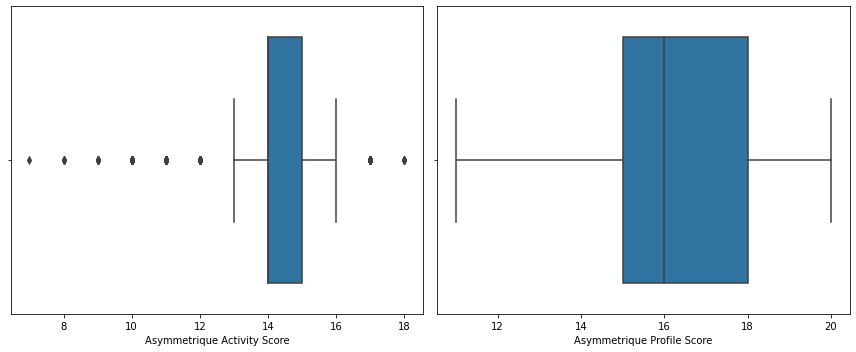

In [11]:
# Assigned scores in boxplots
plt.figure(figsize=(12,5))
i=1
score = ['Asymmetrique Activity Score','Asymmetrique Profile Score']

for col in score:
    plt.subplot(1,2,i)
    sns.boxplot(df[col])
    i +=1
    plt.tight_layout()

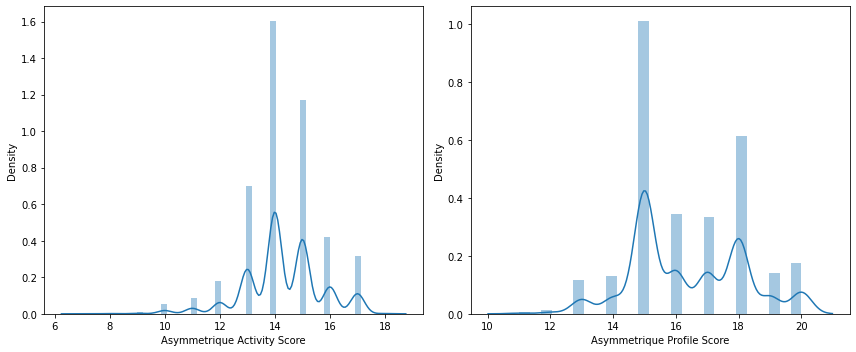

In [12]:
# Assigned scores in distribution plots
plt.figure(figsize=(12,5))
i=1
for col in score:
    plt.subplot(1,2,i)
    sns.distplot(df[col])
    i +=1
    plt.tight_layout()

In [13]:
pd.qcut(df['Asymmetrique Activity Score'], q=3)

0        (14.0, 15.0]
1        (14.0, 15.0]
2       (6.999, 14.0]
3       (6.999, 14.0]
4        (14.0, 15.0]
            ...      
9235     (14.0, 15.0]
9236    (6.999, 14.0]
9237    (6.999, 14.0]
9238     (14.0, 15.0]
9239     (14.0, 15.0]
Name: Asymmetrique Activity Score, Length: 9240, dtype: category
Categories (3, interval[float64]): [(6.999, 14.0] < (14.0, 15.0] < (15.0, 18.0]]

* There are outliers in TotalVisits, Page Views Per Visit, Activity Score. Besides, there are missing values in all 4 columns graphed above. Therefore, I'm going to treat the outliers and fill in missing data. 
* As seen above, scores are equally binned into 3 groups, which then identified as indices. It makes sense to keep either the score or the index because they are related to each other. 

In [14]:
df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index'], axis=1, inplace=True)

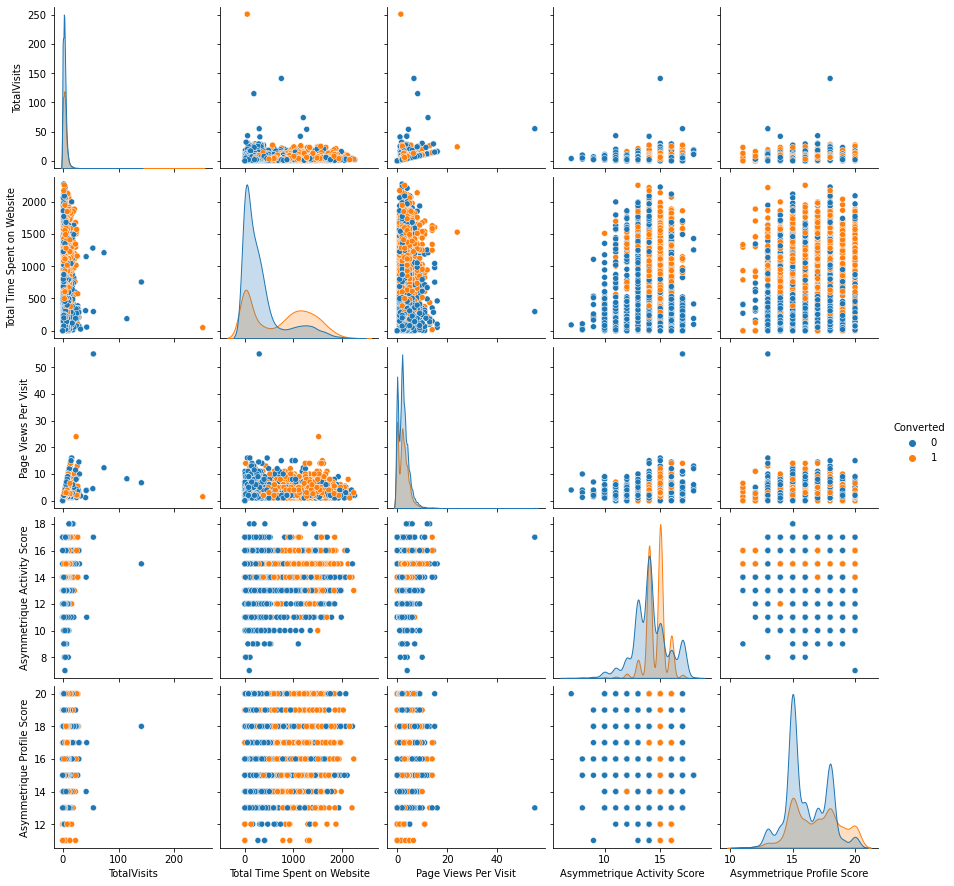

In [15]:
# 2 features relation
sns.pairplot(df, hue='Converted');

* In general, people are more likely to convert if they spend more time on website, regardless to the amount of visits and number of pages viewed.
* The activity and profile scores of whom converted seem to be in correlation with Total Time Spent of Website 

### B.2.2 Categorical Features

In [16]:
cat_df = df.select_dtypes(include='object')

# Check for data variety in each column
cat_df.nunique()

Lead Origin                                       5
Lead Source                                      21
Do Not Email                                      2
Do Not Call                                       2
Last Activity                                    17
Country                                          38
Specialization                                   18
What is your current occupation                   6
What matters most to you in choosing a course     3
Search                                            2
Magazine                                          1
Newspaper Article                                 2
X Education Forums                                2
Newspaper                                         2
Digital Advertisement                             2
Through Recommendations                           2
Receive More Updates About Our Courses            1
Tags                                             26
Lead Quality                                      5
Update me on

In [17]:
# Percentage of values in each feature
a = []
for col in cat_df.columns:
    a.append(round(cat_df[col].value_counts()/cat_df[col].count()*100,2))
a

[Landing Page Submission    52.88
 API                        38.74
 Lead Add Form               7.77
 Lead Import                 0.60
 Quick Add Form              0.01
 Name: Lead Origin, dtype: float64,
 Google               31.16
 Direct Traffic       27.63
 Olark Chat           19.07
 Organic Search       12.54
 Reference             5.80
 Welingak Website      1.54
 Referral Sites        1.36
 Facebook              0.60
 bing                  0.07
 google                0.05
 Click2call            0.04
 Press_Release         0.02
 Social Media          0.02
 Live Chat             0.02
 Pay per Click Ads     0.01
 blog                  0.01
 testone               0.01
 youtubechannel        0.01
 welearnblog_Home      0.01
 WeLearn               0.01
 NC_EDM                0.01
 Name: Lead Source, dtype: float64,
 No     92.06
 Yes     7.94
 Name: Do Not Email, dtype: float64,
 No     99.98
 Yes     0.02
 Name: Do Not Call, dtype: float64,
 Email Opened                    37.62
 S

**Majority of categorical features have 25-51% of missing values**
* In general, values with less than 5% of data share similar meaning. Most of them are inactive or indecisive action. I'm going to group these values into "Others" level
* As mentioned earlier, I'm going to explored and impute appropriate values for missing values in Data Preparation section.

**Columns have very few variations in values can be dropped:**
Do Not Email, Do Not Call, Country, What matters most to you in choosing a course, Search, Magazines, Newspapers Articles, X Education Forums, Newspapers, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque


In [18]:
df.drop(['Do Not Email', 'Do Not Call','Country','What matters most to you in choosing a course',
         'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
         'Through Recommendations','Receive More Updates About Our Courses',
         'Update me on Supply Chain Content','Get updates on DM Content','City',
         'I agree to pay the amount through cheque'],axis=1,inplace=True)

# C. Data Preparation

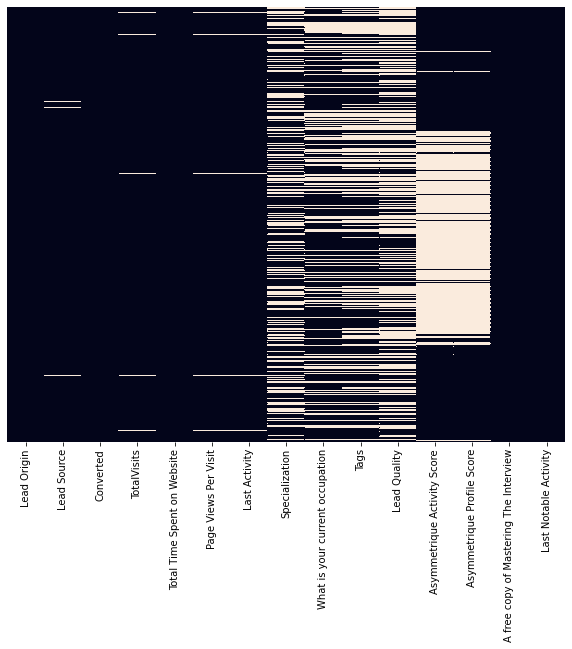

In [19]:
# Current features with null values to impute
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False);

### Question:
**We observe 45.65% of missing Asymmetrique Activity and Profile Score data. Is there a rational way to inpute without breaking business logic?**

**Insights**: 
* *Assumption*: The activity and profile scores look like a result of another algorithm that take in the users' web interaction such as: time spent on website, amount of visits, page views, personal info provided and such.  
* This scoring system can be an important input from another team. They can carry some weighs and business assessment.
* Because they are multimodal distributions, it is not appropriate to choose a univariate to impute the missing data. 
* I'm going to use Multiple Imputation method, which estimates each feature from all others. 

## C.1. Numerical Features

In [20]:
new_df = df.copy().drop('Converted',axis=1)

In [21]:
num_vars = new_df.select_dtypes(include=['float64','int64'])

### C.1.1. Outliers treatment

In [22]:
# Cap the outliers  

def outliers_treatment(col_lst):
    for col in col_lst:
        percentiles = new_df[col].quantile([0.01,0.99]).values
        new_df[col][new_df[col]<=percentiles[0]] = percentiles[0] # replace left outliers with left limit
        new_df[col][new_df[col]>=percentiles[1]] = percentiles[1] # replace left outliers with right limit
        
outliers_treatment(num_vars.columns.tolist())

In [23]:
# Numerical features df received outliers treatment
num_vars_ot = new_df.select_dtypes(include=['float64','int64'])

### C.1.2. Multiple Imputation

The missing values in each numerical features will be imputed with relation to each other by using the Multiple Imputation method

In [24]:
# These columns are treated separately
# This df should concatenate into the final data set for training the model

impute_it = IterativeImputer(verbose=2, tol=1e-10)
num_vars_it = pd.DataFrame(impute_it.fit_transform(num_vars_ot),columns=num_vars.columns)

[IterativeImputer] Completing matrix with shape (9240, 5)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.03
[IterativeImputer] Change: 2.494695850943284, scaled tolerance: 1.8406100000000008e-07 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.05
[IterativeImputer] Change: 1.8752634734136353, scaled tolerance: 1.8406100000000008e-07 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.07
[IterativeImputer] Change: 0.9569269287211108, scaled tolerance: 1.8406100000000008e-07 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.09
[IterativeImputer] Change: 0.43522281349124814, scaled tolerance: 1.8406100000000008e-07 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.11
[IterativeImputer] Change: 0.19062638029423606, scaled tolerance: 1.8406100000000008e-07 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.13
[IterativeImputer] Change: 0.08327204298522517, scaled tolerance: 1.8406100000000008e-07 
[Ite

## C.2. Categorical Features

In [25]:
# Missing data percentage
new_cat = new_df.select_dtypes(include='object')
round(new_cat.isnull().mean()*100,2)

Lead Origin                                0.00
Lead Source                                0.39
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

Using the infortmation from Insights of Categorical Features in EDA section above, the following actions are executed:

In [26]:
# Grouping values with <5% count
def replace_value(col_lst):
    for col in col_lst:
        # Get the source list with less than 5% count
        other_val = new_df[col].value_counts(normalize=True).loc[lambda x:x<0.05].index.tolist()
        # Replace with "Others" level
        new_df[col] = new_df[col].replace(other_val,'Others')
        
replace_value(new_cat.columns.tolist())

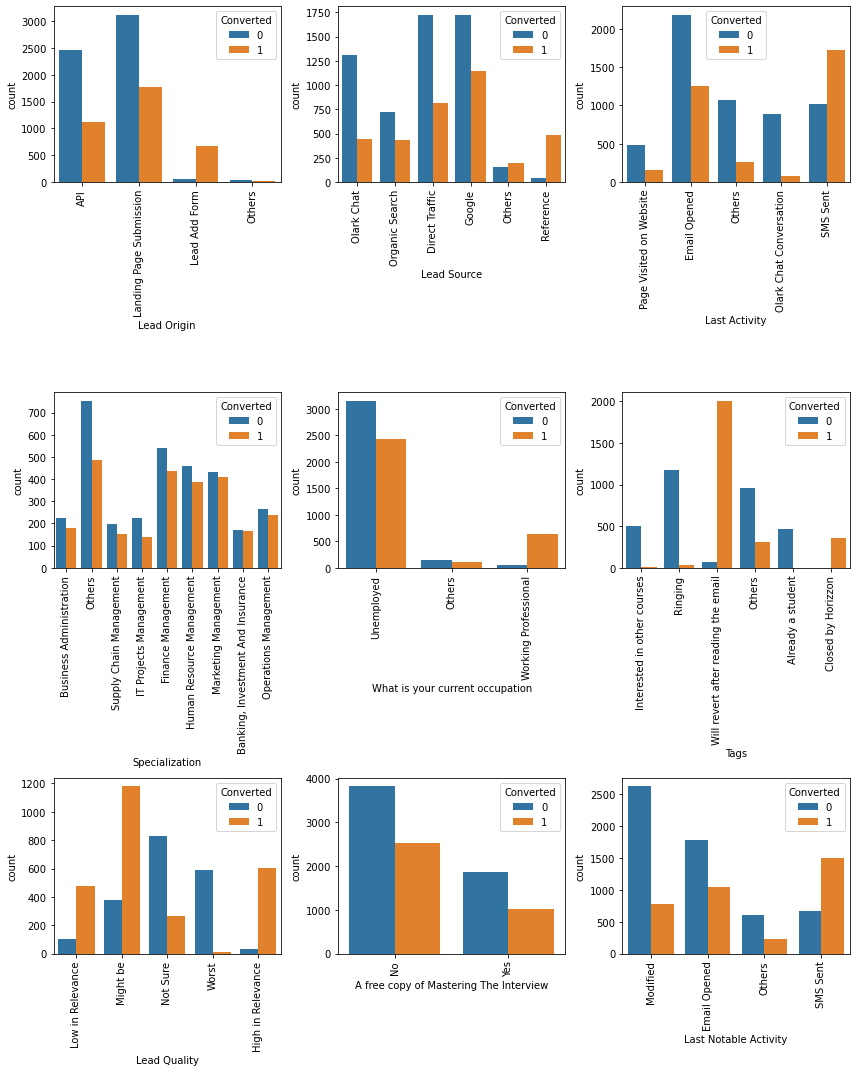

In [27]:
# Categorical features with respect to conversion rate
plt.figure(figsize=(12,15))

i=1
for col in new_cat.columns:
    plt.subplot(3,3,i)
    sns.countplot(new_df[col],hue=df['Converted'])
    i +=1
    plt.xticks(rotation=90)
    plt.tight_layout();

### Insights:
* Working professional are more likely to convert than Unemployed or Others groups. 
* The Specialization feature mainly provides details of working professional group. Thus, we can use the high level feature "Occupation" and drop the "Specialization". 
* For missing data, it seems ok to impute the mode of the column. 
* Except the Lead Quality feature with more than 50% data missing. From a business standpoint, a "Not Sure" value can replace these missing values
* Tags feature carry similar inputs from occupation, last activity. Will drop this feature

### C.2.1. Imputation

In [28]:
# Drop Specialization and Tags
new_df = new_df.drop(['Specialization','Tags'],axis=1)

In [29]:
# Fill in "Not Sure" for missing value in Lead Quality:
new_df['Lead Quality'] = new_df['Lead Quality'].fillna(value='Not Sure')

In [30]:
# Fill in missing value with mode
fill_mode = lambda col:col.fillna(col.mode()[0])

new_df = new_df.apply(fill_mode,axis=0)

### C.2.2. Encoding

In [31]:
# Categorical Columns
cat_col = new_df.select_dtypes(include='object').columns.tolist()

new_df_encd = pd.get_dummies(new_df,prefix_sep="_",columns=cat_col,drop_first=True)

## C.3. Ensemble the Final Clean Data Set

In [32]:
old_num_col = num_vars.columns.tolist()

# Drop old numerical columns
new_df_encd.drop(old_num_col,axis=1,inplace=True)

# Concatenate the treated numerical features (num_vars_it) to the encoded categorical features
X = pd.concat([num_vars_it,new_df_encd],axis=1)

# The complete df 
leads_df = pd.concat([df['Converted'],X],axis=1)

leads_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                          0.0                   0.0   
1          0          5.0                        674.0                   2.5   
2          1          2.0                       1532.0                   2.0   
3          0          1.0                        305.0                   1.0   
4          1          2.0                       1428.0                   1.0   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                         15.0                        15.0   
1                         15.0                        15.0   
2                         14.0                        20.0   
3                         13.0                        17.0   
4                         15.0                        18.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Others  Lead Source_Google  ...  \
0                   0                   0  ...   
1                   0                   0  ...   
2                   0                   0  ...   
3                   0                   0  ...   
4                   0                   1  ...   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Lead Quality_Low in Relevance  Lead Quality_Might be  \
0                              1                      0   
1                              0                      0   
2                              0                      1   
3                              0                      0   
4                              0                      1   

   Lead Quality_Not Sure  Lead Quality_Worst  \
0                      0                   0   
1                      1                   0   
2                      0                   0   
3                      1                   0   
4                      0                   0   

   A free copy of Mastering The Interview_Yes  Last Notable Activity_Modified  \
0                                           0                               1   
1                                           0                               0   
2                                           1                               0   
3                                           0                               1   
4                                           0                               1   

   Last Notable Activity_Others  Last Notable Activity_SMS Sent  
0                             0                               0  
1                             0                               0  
2                             0                               0  
3                             0                               0  
4                             0                               0  

[5 rows x 28 columns]

In [33]:
# Features Coorelation
data = [go.Heatmap(
        z= leads_df.corr().values,
        x= leads_df.columns.values,
        y= leads_df.columns.values,
        colorscale='RdBu_r',
        opacity = 1.0 )]

layout = go.Layout(
    title='Pearson Correlation of Input Features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks=''),
    width = 900, height = 900)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [34]:
# Top 10 features that correlates with Coverted
leads_df.corr()['Converted'].sort_values(ascending=False).head(10)

Converted                                               1.000000
Total Time Spent on Website                             0.363576
Last Notable Activity_SMS Sent                          0.351845
Lead Quality_Might be                                   0.342988
Last Activity_SMS Sent                                  0.325600
Lead Origin_Lead Add Form                               0.321702
What is your current occupation_Working Professional    0.313837
Lead Source_Reference                                   0.270830
Lead Quality_Low in Relevance                           0.230770
Asymmetrique Profile Score                              0.187016
Name: Converted, dtype: float64

# D. Modeling 

In [35]:
X = leads_df.drop('Converted',axis=1)
y = leads_df['Converted']

### D.1. Train - Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Instantiate the Logistic Regression Model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [38]:
# Create a pipeline 
pipe = make_pipeline(StandardScaler(),logmodel)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### D.2. Train the models

Apply cross validation with k-fold = 10 on the train set


In [39]:
# The score order is: accuracy, precision, recall
train_score = [] 
scoring = ['accuracy','precision','recall'] # specify the type of scoring 
scores = cross_validate(pipe, X_train, y_train, cv=10, scoring=scoring)

train_score.append(scores['test_accuracy'].mean())
train_score.append(scores['test_precision'].mean())
train_score.append(scores['test_recall'].mean())

# The model's score on training set
train_scores = pd.DataFrame(train_score,columns=['Train Set'],
                            index=['Accuracy','Precision','Recall'])
train_scores

Train Set
Accuracy    0.858845
Precision   0.847587
Recall      0.772130

In [40]:
# Predicted label (0,1) on the train set
y_train_pred = cross_val_predict(logmodel,X_train,y_train,cv=10)

# Probability of y_train 
y_train_pred_prob = cross_val_predict(logmodel,X_train,y_train,cv=10,method='predict_proba')

# Outputs of the Train set:
train_output = pd.DataFrame({'True Converted':y_train.values,'Predict Converted':y_train_pred,
                             'Predict Probability':y_train_pred_prob[:,1]})
train_output.head()

True Converted  Predict Converted  Predict Probability
0               0                  0             0.167190
1               1                  1             0.970861
2               0                  0             0.193439
3               0                  0             0.262939
4               0                  0             0.312266

### D.3. Tune the Optimal Threshold that classify labels 0 vs 1

We observe an imbalanced labels in Converted from the dataset. Therefore, a precision-recall analysis is more approriate than ROC

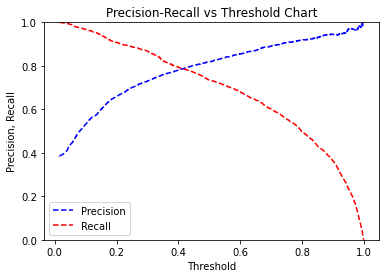

In [41]:
# Finding precision, recall, and thresholds arrays
p, r, thresholds = precision_recall_curve(train_output['True Converted'], train_output['Predict Probability'])
pr_auc = metrics.auc(r,p)

# Precison,recall vs Threshold chart
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, p[: -1], "b--", label="Precision")
plt.plot(thresholds, r[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1]);

The optimal threshold is the point that results in the best balance of precision and recall. This is the same as optimizing the F-measure

Best Threshold=0.33, F-Score=0.796
Precision score = 0.85, Recall score = 0.75


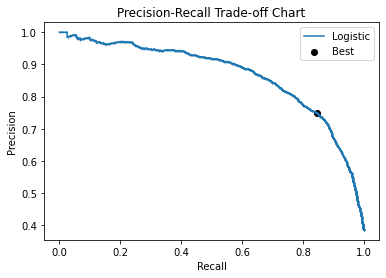

In [42]:
# f score
fscore = (2 * p * r) / (p + r)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%.2f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
print('Precision score = %.2f, Recall score = %.2f' %(r[ix], p[ix]))

# Precision vs Recall chart
plt.plot(r, p, marker='.', label='Logistic',markersize=0.5)
plt.scatter(r[ix], p[ix], marker='o', color='black', label='Best')

plt.title('Precision-Recall Trade-off Chart')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();

The **optimal threshold** to determine the binary class **is 0.33**

The two charts and the model's score on train set are in agreement pointing at the optimal threshold of 0.33 locates where Precision is 0.85 and Recall is 0.75

### D.4. Test The Model

In [43]:
# Apply the model on X_test
y_test_pred = pipe.predict(X_test)

# Probability of predicted y_test
y_test_pred_prob = pipe.predict_proba(X_test)[:,1]

# Create a df for Test Set output
test_output = pd.DataFrame({'True Converted':y_test.values,'Predict Probability':y_test_pred_prob})

# Predicted Converted Label in which optimal threshold applies
test_output['Predict Converted'] = test_output['Predict Probability'].apply(lambda x: 1 if x > 0.33 else 0)

# Lead Score
test_output['Lead Score'] = round(test_output['Predict Probability']*100)

test_output.head()

True Converted  Predict Probability  Predict Converted  Lead Score
0               1             0.123056                  0        12.0
1               0             0.083149                  0         8.0
2               0             0.033977                  0         3.0
3               0             0.275551                  0        28.0
4               0             0.039690                  0         4.0

## E. Model Evaluation

In [44]:
# The model's score on test set
test_score = []

conf_matrix = confusion_matrix(y_test,y_test_pred)
print(classification_report(y_test,y_test_pred))
'\n'
print(conf_matrix)

tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
error = (fp + fn) / total # Missclassification Rate

test_score.append(accuracy)
test_score.append(precision)
test_score.append(recall)

test_scores = pd.DataFrame(test_score,columns=['Test Set'],
                            index=['Accuracy','Precision','Recall'])
test_scores

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1695
           1       0.85      0.78      0.82      1077

    accuracy                           0.86      2772
   macro avg       0.86      0.85      0.85      2772
weighted avg       0.86      0.86      0.86      2772

[[1549  146]
 [ 233  844]]


Test Set
Accuracy   0.863276
Precision  0.852525
Recall     0.783658

In [45]:
# Compare the train and test scores
pd.concat([train_scores,test_scores],axis=1)

Train Set  Test Set
Accuracy    0.858845  0.863276
Precision   0.847587  0.852525
Recall      0.772130  0.783658

### Question:
**What other features data engineers can implement to improve the model?**

The evaluation scores indicate that the model is not over-fitting and a minimal chance of data leakage. We can improve the dataset by collecting some more features:
* Improve quality of the survey or form questions to receive more user inputs (reduce NaN values)
* Improve algorithm for the Activity and Profile Score to produce complete results
* Time stamp visiting the websites for seasonality analysis

# F. Conclusion/Deployment

The logistic regression model built with threshold of 0.33 is able to produce 86% accuracy and 85% precision on identify the users that will likely to convert to cutomers. 

The main features that the company should focus on to increase the conversion rate are: Website contents (increase Time Spent on Website), Working Professional, Sending SMS, Customers who fill Add From

The results and findings from this notebook are available for viewing and feedback.  